In [1]:
import os
from glob import glob
import json
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import music21
warnings.filterwarnings("ignore")

import pretty_midi as pm
from ezchord import Chord

from melody import Melody
from utils import get_chord_progressions
from objective_metrics import calculate_HC

In [2]:
%matplotlib inline

In [3]:
src_folder = '..'

version = '1.2'
folder = f"../data/Complete Examples Melodies Auto/v{version}/Real Book"

chord_progressions = get_chord_progressions(src_folder)

files = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [4]:
res = pd.read_csv(
    '../data/alignment_scores/v1.2/results-12-03-2022-16-13-35.csv', 
    index_col=0).set_index('filename')

In [5]:
res.tail()

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,melody_mido_key,melody_music_21_key,melody_music_21_key2,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
filename,,,,,,,,,,,,,,,,
Satin Doll.mid,32,100,3,2,99,2,2,0,Real Book,C major,G major,G major,C,0,"[1.0, 0.6666, 1.0, 1.0, 0.6666, 0.0, 1.0, 1.0,...",0.734274
Secret Love.mid,24,148,6,2,147,2,2,0,Real Book,E- major,B- major,E- major,Eb,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.6666, 1.0, 1.0, 1....",0.811570
September Song.mid,32,99,3,1,99,3,2,1,Real Book,C major,C major,C major,Bb,10,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333, 1.0, 1....",0.894304
Shiny Stockings.mid,32,100,3,1,99,3,2,1,Real Book,A- major,A- major,f minor,F,9,"[0.6666, 1.0, 0.6666, 0.6666, 0.6666, 1.0, 0.6...",0.736638
Since I Fell For You.mid,32,100,3,2,99,2,2,0,Real Book,B- major,B- major,B- major,Eb,5,"[1.0, 0.6666, 1.0, 0.0, 1.0, 1.0, 0.6666, 1.0,...",0.766158


In [6]:
res[res['min_measure'] > 2]

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,melody_mido_key,melody_music_21_key,melody_music_21_key2,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
filename,,,,,,,,,,,,,,,,
Beauty And The Beast.mid,36,123,3,5,122,10,13,-3,Real Book,C major,g# minor,E major,F,5,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",0.624993


In [7]:
res.sort_values('outro_auto', ascending=False).head(10)

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,melody_mido_key,melody_music_21_key,melody_music_21_key2,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
filename,,,,,,,,,,,,,,,,
A Night In Tunisia.mid,64,110,1,1,110,46,45,1,Real Book,F major,a minor,F major,Dm,0,"[1.0, 1.0, 0.6666, 0.6666, 1.0, 0.6666, 0.0, 1...",0.795041
Daahoud.mid,68,110,1,1,110,42,41,1,Real Book,E- major,e- minor,C# major,Eb,0,"[0.6666, 1.0, 0.6666, 1.0, 0.6666, 1.0, 1.0, 1...",0.746011
Black Orpheus.mid,68,105,1,1,106,38,37,1,Real Book,C major,a minor,a minor,Am,0,"[1.0, 0.6666, 1.0, 1.0, 0.6666, 1.0, 1.0, 1.0,...",0.827799
I Got Rhythm.mid,68,106,1,2,105,36,36,0,Real Book,B- major,B- major,B- major,Bb,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666, 1....",0.817356
Lazy Bird.mid,73,107,1,2,107,33,33,0,Real Book,G major,d minor,g minor,G,0,"[0.6666, 1.0, 0.6666, 1.0, 0.6666, 1.0, 0.6666...",0.851562
A Felicidade.mid,48,178,3,1,177,33,32,1,Real Book,E- major,c minor,c minor,Am,9,"[1.0, 1.0, 0.6666, 1.0, 1.0, 1.0, 1.0, 1.0, 1....",0.817442
Ruby My Dear.mid,66,99,1,2,99,32,32,0,Real Book,E- major,c minor,A- major,Eb,0,"[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.6666, 0....",0.601326
Dancing On The Ceiling.mid,34,100,2,2,99,30,30,0,Real Book,F major,F major,F major,F,0,"[1.0, 1.0, 0.3333, 1.0, 0.6666, 1.0, 1.0, 1.0,...",0.827439
I Don't Know Why.mid,60,92,1,2,91,30,30,0,Real Book,B- major,g minor,g minor,Bb,0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.760328


In [8]:
res[res['outro_auto'] > 8]['outro_auto'].iloc[0:]

filename
A Felicidade.mid               32
A Night In Tunisia.mid         45
Accentuate The Positive.mid    24
Falling Grace.mid              24
Make Someone Happy.mid         12
New York, New York.mid         16
Oleo.mid                       20
Ana Maria.mid                  14
I Don't Know Why.mid           30
I Got Rhythm.mid               36
I'll Be Seeing You.mid         24
Solar.mid                      10
Speak Low.mid                  26
Anything Goes.mid               9
Beauty And The Beast.mid       13
Black Orpheus.mid              37
Blue Train.mid                 12
Daahoud.mid                    41
Dancing On The Ceiling.mid     30
In Your Own Sweet Way.mid      26
Isn't It Romantic.mid          17
Lady Is A Tramp.mid            12
Lazy Bird.mid                  33
Recado Bossa Nova.mid          24
Ruby My Dear.mid               32
Name: outro_auto, dtype: int64

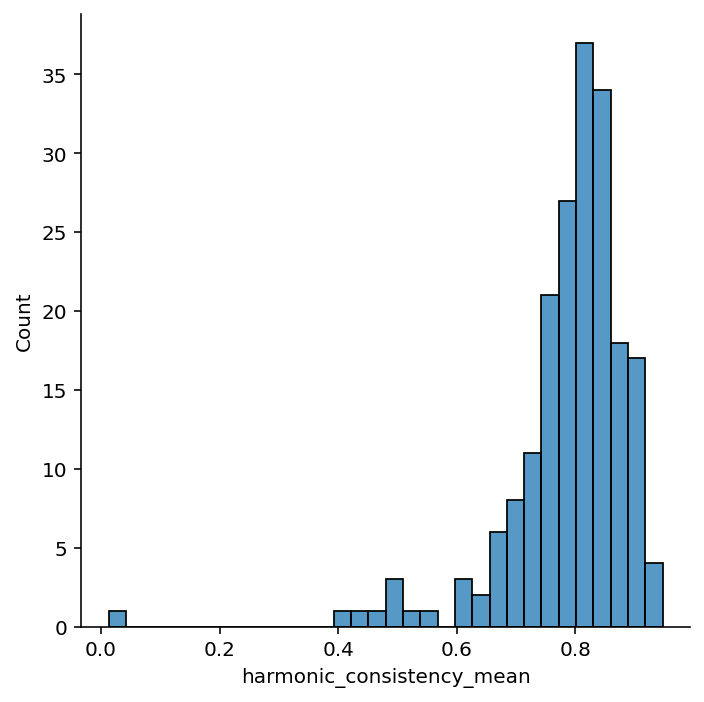

In [9]:
sns.displot(res['harmonic_consistency_mean'])

In [10]:
res[res['harmonic_consistency_mean'] <= 0.7].sort_values('harmonic_consistency_mean')['harmonic_consistency_mean']

filename
Giant Steps.mid                          0.012819
Dolores.mid                              0.403745
Epistrophy.mid                           0.441899
Speak No Evil.mid                        0.479844
Monk's Mood.mid                          0.495923
In Your Own Sweet Way.mid                0.499983
Beautiful Friendship.mid                 0.506320
House Of Jade.mid                        0.537617
Equinox.mid                              0.564069
Ruby My Dear.mid                         0.601326
They Can't Take That Away From Me.mid    0.606538
Beauty And The Beast.mid                 0.624993
Margie.mid                               0.640334
Oleo.mid                                 0.643655
Deep Purple.mid                          0.655282
Esp.mid                                  0.658105
Blue Monk.mid                            0.660804
Laura.mid                                0.666652
In A Mellow Tone.mid                     0.669543
Ana Maria.mid                            

In [27]:
res = pd.read_csv(
    '../data/alignment_scores/v1.2/results-13-03-2022-23-23-22.csv', 
    index_col=0).set_index('filename')

In [28]:
res[res['harmonic_consistency_mean'] <= 0.7].sort_values('harmonic_consistency_mean')['harmonic_consistency_mean']

filename
Epistrophy.mid                           0.593417
They Can't Take That Away From Me.mid    0.606538
Margie.mid                               0.640334
Deep Purple.mid                          0.655282
Esp.mid                                  0.658105
Blue Monk.mid                            0.660804
Laura.mid                                0.666652
In A Mellow Tone.mid                     0.669543
House Of Jade.mid                        0.673812
Prelude To A Kiss.mid                    0.687359
Come Sunday.mid                          0.691740
Straight, No Chaser.mid                  0.697900
Name: harmonic_consistency_mean, dtype: float64

In [26]:
res[res['starting_measure'] == 5]

,cp_measures,n_measures,repetitions,min_measure,max_measure,outro_init,outro_auto,outro_difference,source,starting_measure,melody_mido_key,chord_progression_key,transpose_semitones,harmonic_consistency,harmonic_consistency_mean
filename,,,,,,,,,,,,,,,
Beauty And The Beast.mid,28,123,4,5,122,6,6,0,Real Book,5,C major,F,5,"[1.0, 0.6666, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1....",0.704851
Bemsha Swing.mid,16,51,3,1,51,3,15,-12,Real Book,5,C major,C,0,"[1.0, 1.0, 0.0, 1.0, 0.6666, 0.3333, 1.0, 0.66...",0.453881
Bessie's Blues.mid,12,39,3,2,39,2,11,-9,Real Book,5,E- major,Eb,0,"[1.0, 0.0, 1.0, 1.0, 0.6666, 1.0, 1.0, 0.6666,...",0.735021
Bewitched.mid,32,99,3,1,99,3,31,-28,Real Book,5,C major,C,0,"[0.6666, 1.0, 1.0, 0.6666, 1.0, 0.6666, 1.0, 1...",0.788170
Black Orpheus.mid,63,105,1,1,106,43,39,4,Real Book,5,C major,Am,0,"[1.0, 1.0, 1.0, 0.6666, 1.0, 0.6666, 0.6666, 1...",0.708900
Blue In Green.mid,14,35,2,2,34,5,2,3,Real Book,5,F major,Dm,0,"[0.6666, 1.0, 1.0, 0.6666, 1.0, 0.6666, 0.0, 1...",0.666650
Blue Monk.mid,12,93,7,2,92,7,4,3,Real Book,5,B- major,Bb,0,"[0.0, 0.6666, 1.0, 0.6666, 0.0, 1.0, 1.0, 0.0,...",0.608165
Blue Train.mid,26,38,1,1,39,13,9,4,Real Book,5,E- major,Bb,7,"[0.6666, 0.0, 1.0, 0.0, 0.6666, 1.0, 1.0, 0.66...",0.723055
Blues For Alice.mid,12,38,3,1,38,2,10,-8,Real Book,5,F major,F,0,"[0.0, 0.6666, 0.0, 1.0, 1.0, 0.3333, 0.0, 0.0,...",0.527116


In [29]:
res = pd.read_csv(
    '../data/alignment_scores/v1.2/results-14-03-2022-01-35-34.csv', 
    index_col=0).set_index('filename')

In [32]:
res[res['harmonic_consistency_mean'] <= 0.75].sort_values('harmonic_consistency_mean')['harmonic_consistency_mean']

filename
Epistrophy.mid                            0.593417
They Can't Take That Away From Me.mid     0.606538
Deep Purple.mid                           0.655282
Blue Monk.mid                             0.660804
In A Mellow Tone.mid                      0.669543
House Of Jade.mid                         0.673812
Prelude To A Kiss.mid                     0.687359
Straight, No Chaser.mid                   0.697900
Make Someone Happy.mid                    0.701422
Speak No Evil.mid                         0.703257
Lulu's Back In Town.mid                   0.703345
Beauty And The Beast.mid                  0.704851
Anthropology.mid                          0.705027
Oleo.mid                                  0.706871
I Can't Give You Anything But Love.mid    0.710598
Criss-Cross.mid                           0.711629
Now's The Time.mid                        0.717933
Beautiful Love.mid                        0.722203
Bemsha Swing.mid                          0.723391
Invitation.mid        

In [33]:
import numpy as np
import pandas as pd

def rolling_positive_average(a, window=3):
     s = pd.Series(a)
     s[s < 0] = np.nan
     result = s.rolling(window, center=True, min_periods=1).mean()
     result.iloc[:window // 2] = np.nan
     result.iloc[-(window // 2):] = np.nan
        
     return result 

In [45]:
res['harmonic_consistency_var'] = res['harmonic_consistency'].apply([lambda x: np.var(eval(x))])

In [48]:
res['harmonic_consistency_var'].sort_values(ascending=False)

filename
Epistrophy.mid                           0.182345
Blue Monk.mid                            0.173455
Beauty And The Beast.mid                 0.173311
They Can't Take That Away From Me.mid    0.169427
Criss-Cross.mid                          0.166409
                                           ...   
Alone Together.mid                       0.034688
Giant Steps.mid                          0.027131
Polka Dots And Moonbeams.mid             0.023316
Moonglow.mid                             0.014871
Eighty-One.mid                                NaN
Name: harmonic_consistency_var, Length: 198, dtype: float64

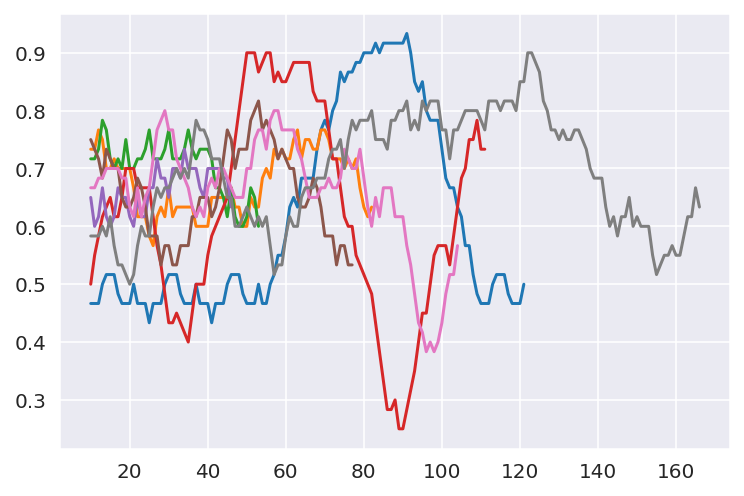

In [39]:
for hc in res[res['harmonic_consistency_mean'] < 0.7]['harmonic_consistency']:
    hc_list = eval(hc)
    sns.set_style("darkgrid")
    plt.plot(rolling_positive_average(hc_list, 20))
plt.show()

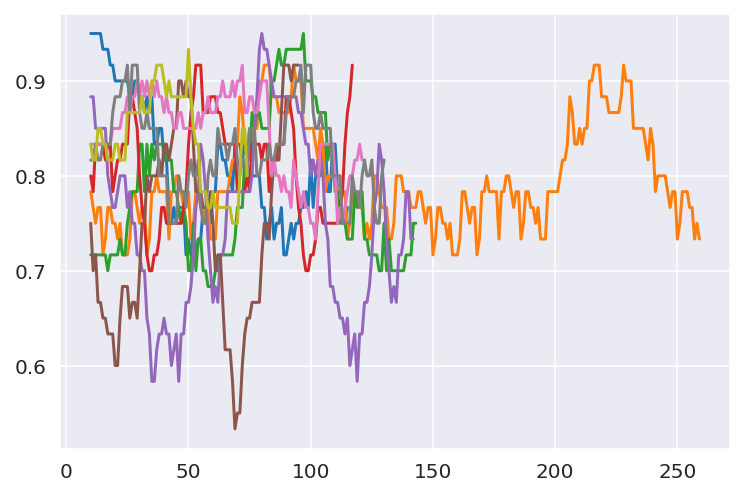

In [40]:
for hc in res[res['outro_auto'] > 20]['harmonic_consistency']:
    hc_list = eval(hc)
    sns.set_style("darkgrid")
    plt.plot(rolling_positive_average(hc_list, 20))
plt.show()

In [13]:
res.loc['Ana Maria.mid']

cp_measures                                                                 46
n_measures                                                                 153
repetitions                                                                  3
min_measure                                                                  2
max_measure                                                                153
outro_init                                                                  14
outro_auto                                                                  14
outro_difference                                                             0
source                                                               Real Book
melody_mido_key                                                        G major
melody_music_21_key                                                    g minor
melody_music_21_key2                                                  E- major
chord_progression_key                               

In [16]:
folder = f'../data/Complete Examples/v{version}'

filepaths = [y for x in os.walk(folder) for y in glob(os.path.join(x[0], '*.mid'))]

In [17]:
filepaths

["../data/Complete Examples/v1.2/Doug McKenzie/After You've Gone.mid",
 '../data/Complete Examples/v1.2/Doug McKenzie/Alice In Wonderland.mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/All The Things You Are (1).mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/All The Things You Are (2).mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/All The Things You Are (3).mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/Alone Together.mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/Autumn Leaves.mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/Black Orpheus.mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/Blue Room.mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/But Beautiful.mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/Come Rain Or Come Shine (1).mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/Come Rain Or Come Shine (2).mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/Come Sunday.mid',
 '../data/Complete Examples/v1.2/Doug McKenzie/Cry Me A R